<a href="https://colab.research.google.com/github/tamer017/ML-Assessments/blob/master/Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 

Running this project require the following imports 

In [5]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from scipy.spatial.distance import cdist
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from operator import itemgetter
%matplotlib inline

In [2]:
plt.figure(figsize=(16,8))
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, km = [], num_clusters = 0):
    color = ["blue","orange","green","red","purple","brown","pink","gray","olive","cyan","yellow","black","lime","magenta"]  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0], X[:,1], c = color[0], alpha = alpha, s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_ == i, 0], X[km.labels_ == i, 1], c = color[i], alpha = alpha, s = s)
            plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], c = color[i], marker = 'x', s = 100)

<Figure size 1152x576 with 0 Axes>

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



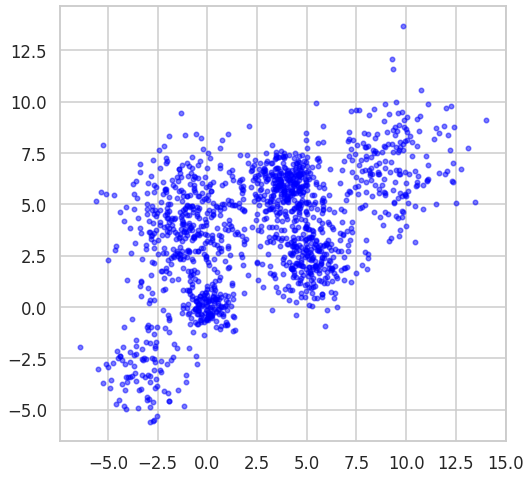

In [3]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [15]:
def K_mean(X, min_clusters = 2, max_clusters = 14): 
  distortion_functions = []
  silhouette_scores = []
  inertias = []
  for n_clusters in range(min_clusters, max_clusters+1):
      Kmean = KMeans(n_clusters = n_clusters)
      Kmean.fit(X)
      if X.shape[1] == 2:
        display_cluster(X, km = Kmean, num_clusters = n_clusters)
      distortion_function = sum(np.min(cdist(X, Kmean.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
      inertia = Kmean.inertia_ 
      inertias.append(inertia)
      distortion_functions.append(distortion_function) 
      silhouette_scoree = silhouette_score(X, Kmean.labels_)
      silhouette_scores.append(silhouette_scoree)
      print("For", n_clusters, "clusters,", "the average silhouette_score is :", silhouette_scoree, ", the destortion function is :", distortion_function, ",and inertia is :",inertia)
      plt.show()
  plt.figure(figsize=(16,8))
  plt.plot(list(range(min_clusters,max_clusters+1)), distortion_functions, 'bx-')
  plt.xlabel('k (number of clusters)')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method for distortion showing the optimal k')
  plt.show()
  plt.figure(figsize=(16,8))
  plt.plot(list(range(min_clusters,max_clusters+1)), inertias, 'bx-')
  plt.xlabel('k (number of clusters)')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method for inertia showing the optimal k')
  plt.show()
  plt.figure(figsize=(16,8))
  plt.plot(list(range(min_clusters,max_clusters+1)), silhouette_scores, 'bx-')
  plt.xlabel('k (number of clusters)')
  plt.ylabel('Silhouette score ')
  plt.title('The Elbow Method for silhouette score showing the optimal k')
  plt.show()
  index, element = max(enumerate(silhouette_scores), key=itemgetter(1))
  max_silhouette_score_kmean = {"n_clusters":index+2,"silhouette_score":element}

For 2 clusters, the average silhouette_score is : 0.4751544541991239 , the destortion function is : 3.0296089763225997 ,and inertia is : 16716.61917540343


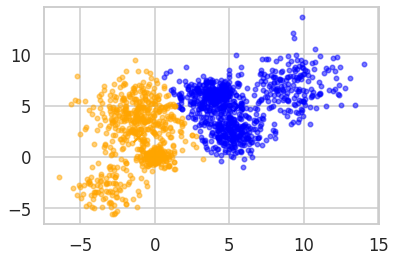

For 3 clusters, the average silhouette_score is : 0.43748364762293124 , the destortion function is : 2.560922654619733 ,and inertia is : 12095.807065040495


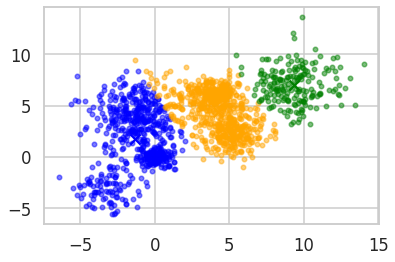

For 4 clusters, the average silhouette_score is : 0.4628725400351352 , the destortion function is : 2.1065678482608474 ,and inertia is : 7812.075861193691


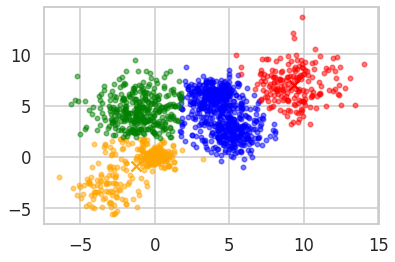

For 5 clusters, the average silhouette_score is : 0.48100602217073096 , the destortion function is : 1.7169227547484112 ,and inertia is : 5600.217515342452


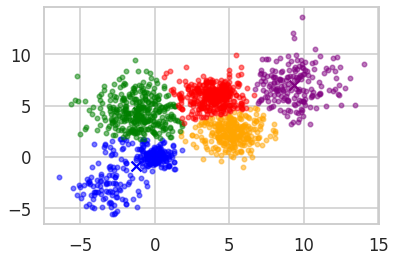

For 6 clusters, the average silhouette_score is : 0.48614459735646176 , the destortion function is : 1.5043461290060023 ,and inertia is : 4310.421659203395


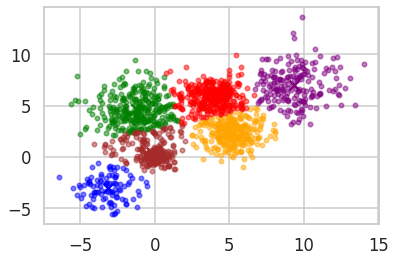

For 7 clusters, the average silhouette_score is : 0.46340972197949165 , the destortion function is : 1.4110078118049556 ,and inertia is : 3811.1633360756578


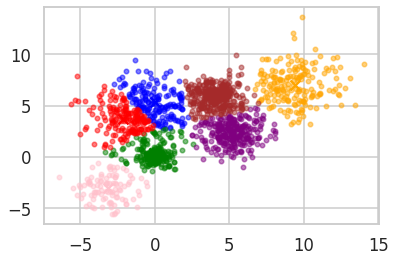

For 8 clusters, the average silhouette_score is : 0.4437992701413617 , the destortion function is : 1.349960730169758 ,and inertia is : 3446.155145612209


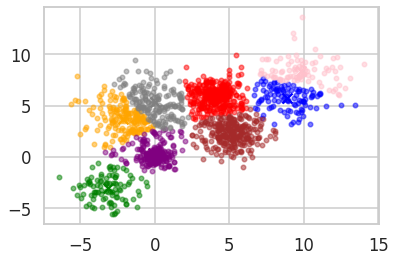

For 9 clusters, the average silhouette_score is : 0.43982556514795823 , the destortion function is : 1.2840520724886095 ,and inertia is : 3096.409915406266


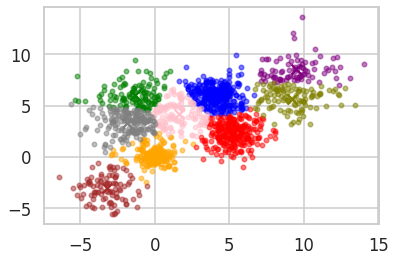

For 10 clusters, the average silhouette_score is : 0.38777416620659977 , the destortion function is : 1.228216601539514 ,and inertia is : 2853.6686034435716


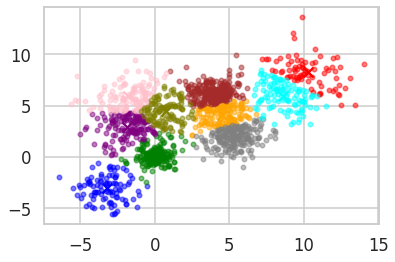

For 11 clusters, the average silhouette_score is : 0.4039612825912773 , the destortion function is : 1.1845088235299177 ,and inertia is : 2620.96774921043


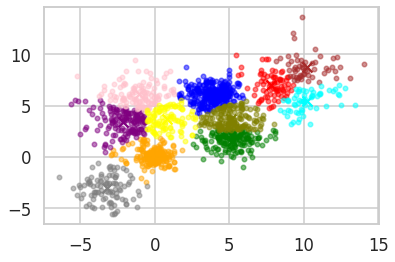

For 12 clusters, the average silhouette_score is : 0.3703394412124213 , the destortion function is : 1.135661703809989 ,and inertia is : 2472.476621566203


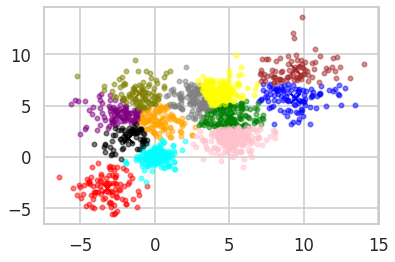

For 13 clusters, the average silhouette_score is : 0.38983676195562394 , the destortion function is : 1.101904322187355 ,and inertia is : 2256.71836719127


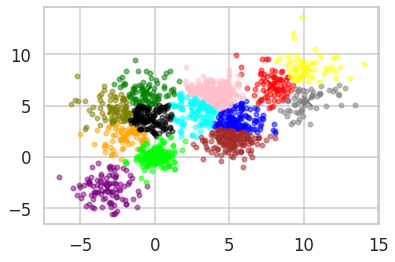

For 14 clusters, the average silhouette_score is : 0.37302338115324574 , the destortion function is : 1.063610322100831 ,and inertia is : 2123.0267726040656


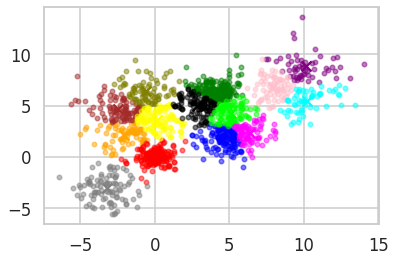

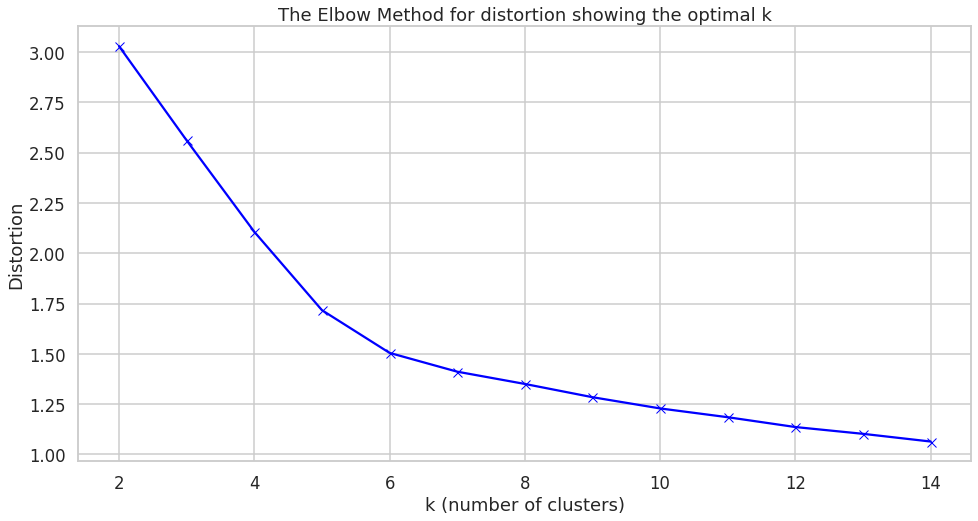

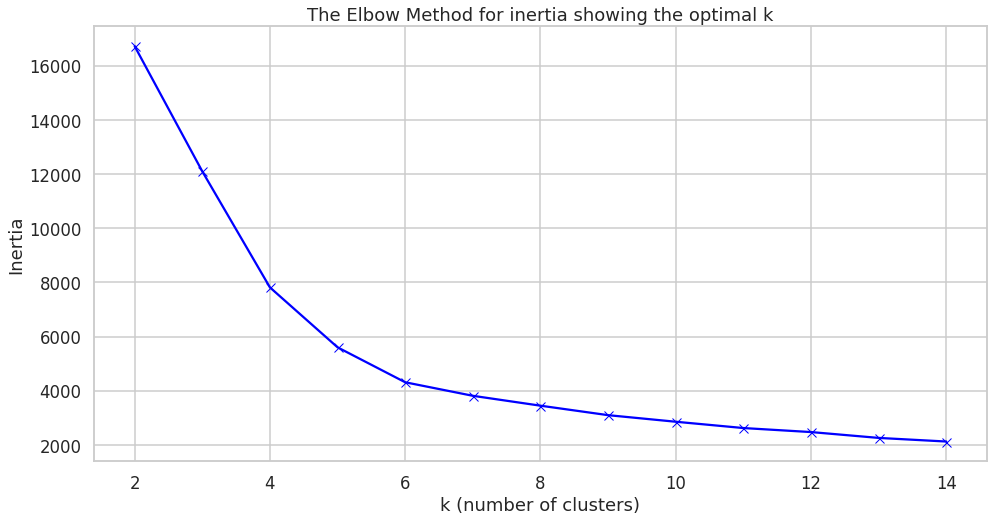

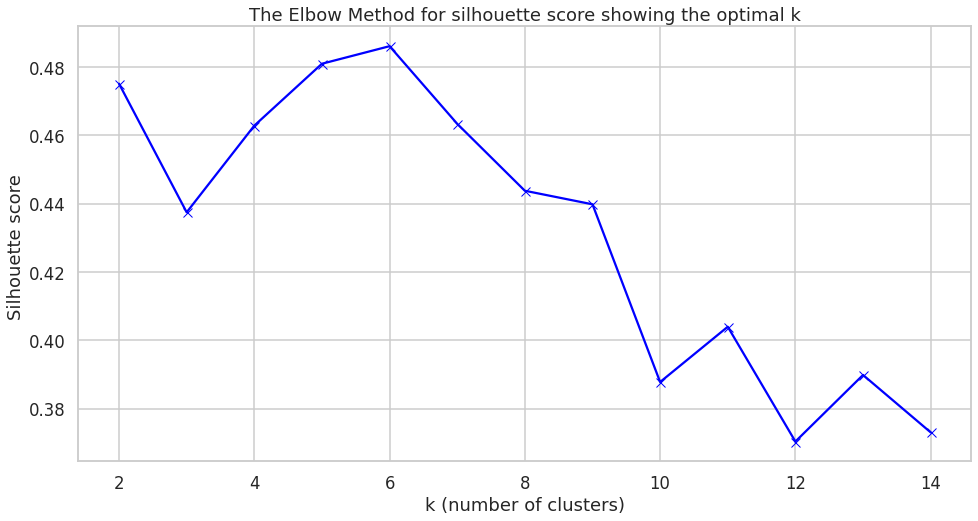

In [16]:
K_mean(Multi_blob_Data)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
X = Multi_blob_Data

# Define parameter combinations to try
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']
distance_thresholds = [5, 10]

# Initialize variables to store best results
best_silhouette_score = -1
best_params = {}

# Loop over all parameter combinations and perform clustering
for affinity in affinities:
    for linkage_method in linkages:
        for distance_threshold in distance_thresholds:
            # Initialize model with current parameters
            model = AgglomerativeClustering(n_clusters=None, 
                                             affinity=affinity, 
                                             linkage=linkage_method,
                                             distance_threshold=distance_threshold)
            model.fit(X)
            if (np.unique(model.labels_).shape[0] > 1):
              # Calculate the silhouette score
              silhouette_avg = silhouette_score(X, model.labels_)
              print("The number of clusters is :",np.unique(model.labels_).shape[0],"clusters")
              print(f"Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold}")
              print(f"Silhouette Score: {silhouette_avg:.2f}")

              # If the current score is better than the previous best score, update the variables
              if silhouette_avg > best_silhouette_score:
                  best_silhouette_score = silhouette_avg
                  best_params = {'affinity': affinity, 'linkage': linkage_method, 'distance_threshold': distance_threshold,"nuber of clusters" : np.unique(model.labels_).shape[0]}

              # Plot the dendrogram
              linkage_matrix = linkage(model.children_, method=linkage_method)
              plt.figure(figsize=(12, 5))
              plt.title(f"Dendrogram ({affinity}, {linkage_method})\nSilhouette Score: {silhouette_avg:.2f}")
              dendrogram(linkage_matrix,)
              plt.show()
            else:
              print("distance threshold :",distance_threshold,", linkage methode :",linkage_method,", and affinity :",affinity,"produce only one cluster")
            print("-----------------------------------------------------------------------------------------------------")

print(f"\nBest Silhouette Score: {best_silhouette_score:.2f}")
print(f"Best Parameters: {best_params}")


The number of clusters is : 5 clusters
Affinity: euclidean, Linkage: average, Distance Threshold: 5
Silhouette Score: 0.43


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define parameter combinations to try
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']
distance_thresholds = [0.5, 1.0, 1.5, 2.0]

# Loop over all parameter combinations and perform clustering
for distance_threshold in distance_thresholds:
    # Initialize model with current parameters
    model = AgglomerativeClustering(n_clusters=None, 
                                    affinity="euclidean", 
                                    linkage="single" ,
                                    distance_threshold=distance_threshold)
    model.fit(X)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, model.labels_)

    # Plot the dendrogram
    linkage_matrix = linkage(model.children_, method="single")
    plt.figure(figsize=(12, 5))
    plt.title(f"Dendrogram (Distance Threshold: {distance_threshold}, Silhouette Score: {silhouette_avg:.2f})")
    dendrogram(linkage_matrix, no_plot=False)
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [13]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [22]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

For 2 clusters, the average silhouette_score is : 0.6810461692117462 , the destortion function is : 0.8555777695266533 ,and inertia is : 152.3479517603579
For 3 clusters, the average silhouette_score is : 0.5528190123564095 , the destortion function is : 0.6480304904934434 ,and inertia is : 78.851441426146
For 4 clusters, the average silhouette_score is : 0.49805050499728737 , the destortion function is : 0.5573847727333312 ,and inertia is : 57.22847321428572
For 5 clusters, the average silhouette_score is : 0.48874888709310566 , the destortion function is : 0.5096521951118286 ,and inertia is : 46.446182051282065
For 6 clusters, the average silhouette_score is : 0.36483400396700255 , the destortion function is : 0.4670733963396438 ,and inertia is : 39.03998724608726
For 7 clusters, the average silhouette_score is : 0.3543700787497399 , the destortion function is : 0.43896565476334376 ,and inertia is : 34.42448428383212
For 8 clusters, the average silhouette_score is : 0.347043703590741

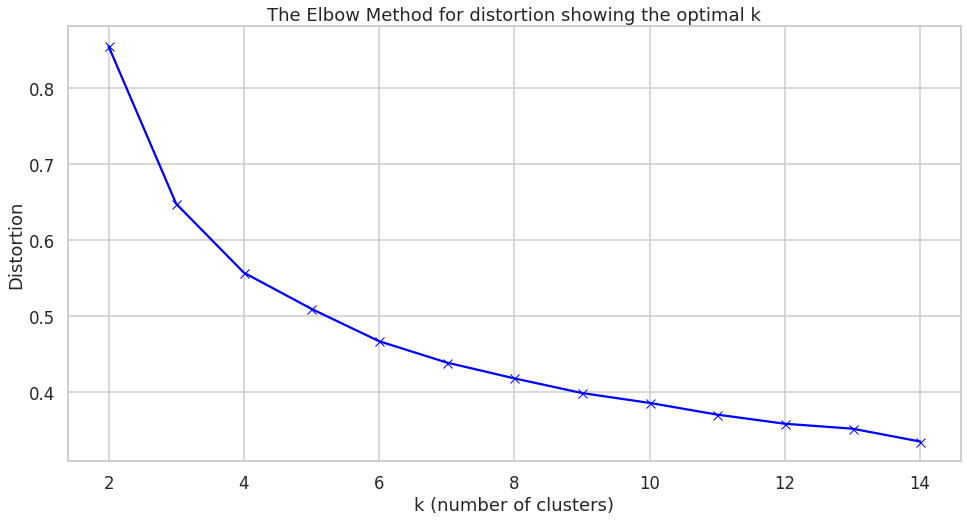

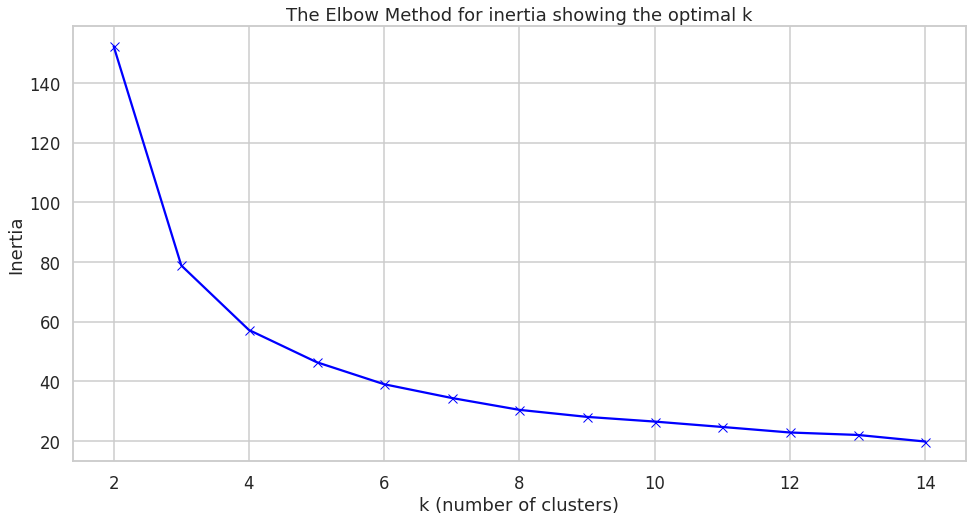

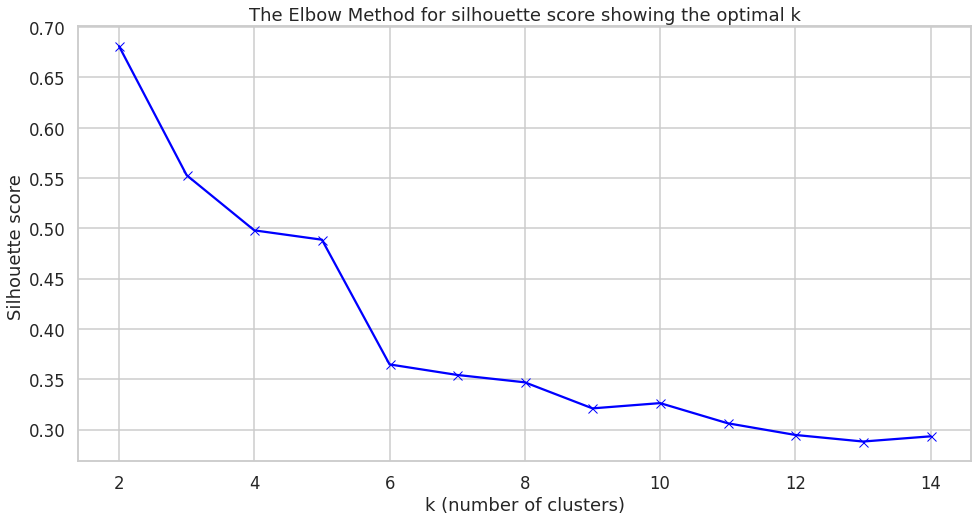

In [20]:
K_mean(iris_data["data"])

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 